# Data Integrity

In this notebook, initial tests of data integrity are investigated and solutions are sought after. The following questions are asked:

* What are the data types? Are they consistent with expectations
* Are any data points duplicated? If so, why, how?
* Are the nulls? If so, why, how? is it better to keep them as NaNs or attempt to impute?

In [1]:
import numpy as np
import pandas as pd

from rdkit import Chem
from rdkit.Chem import PandasTools

In [3]:
#get data

all_data = 'data/tox21_10k_data_all.sdf'
source = PandasTools.LoadSDF(all_data,
                            smilesName='SMILES',
                            molColName='Molecule',
                            includeFingerprints=True)

RDKit ERROR: [12:29:35] Explicit valence for atom # 3 Cl, 2, is greater than permitted
RDKit ERROR: [12:29:35] ERROR: Could not sanitize molecule ending on line 21572
RDKit ERROR: [12:29:35] ERROR: Explicit valence for atom # 3 Cl, 2, is greater than permitted
RDKit ERROR: [12:29:40] Explicit valence for atom # 2 Si, 8, is greater than permitted
RDKit ERROR: [12:29:40] ERROR: Could not sanitize molecule ending on line 346021
RDKit ERROR: [12:29:40] ERROR: Explicit valence for atom # 2 Si, 8, is greater than permitted
RDKit ERROR: [12:29:42] Explicit valence for atom # 3 Cl, 2, is greater than permitted
RDKit ERROR: [12:29:42] ERROR: Could not sanitize molecule ending on line 446665
RDKit WARNING: [12:29:42] Warning: conflicting stereochemistry at atom 9 ignored.
RDKit WARNING: [12:29:42] Warning: conflicting stereochemistry at atom 9 ignored.
RDKit ERROR: [12:29:42] ERROR: Explicit valence for atom # 3 Cl, 2, is greater than permitted
RDKit ERROR: [12:29:44] Explicit valence for atom #

,Formula,FW,DSSTox_CID,SR-HSE,ID,SMILES,Molecule,NR-AR,SR-ARE,NR-Aromatase,NR-ER-LBD,NR-AhR,SR-MMP,NR-ER,NR-PPAR-gamma,SR-p53,SR-ATAD5,NR-AR-LBD
0,C27H25ClN6,468.9806 (35.4535+224.2805+209.2465),25848,0,NCGC00178831-03,C[n+]1c2cc(N)ccc2cc2ccc(N)cc21.Nc1ccc2cc3ccc(N...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C20H6Br4Na2O5,691.8542 (645.8757+22.9892+22.9892),5234,0,NCGC00166114-03,O=C([O-])c1ccccc1-c1c2cc(Br)c(=O)c(Br)c-2oc2c(...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C47H83NO17,934.1584 (916.1205+18.0379),28909,0,NCGC00263563-01,CO[C@H]1CC(O[C@H]2C[C@H]([C@H]3O[C@](C)(O)[C@H...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C52H54N4O12,927.0048 (329.4575+89.0275+89.0275+329.4575+90...,5513,1,NCGC00013058-02,CN(C)c1ccc(C(=C2C=CC(=[N+](C)C)C=C2)c2ccccc2)c...,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C66H87N17O14,1342.5025 (1282.4505+60.0520),26683,NaN,NCGC00167516-01,CC(=O)O.CCNC(=O)[C@@H]1CCCN1C(=O)[C@H](CCCNC(=...,,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

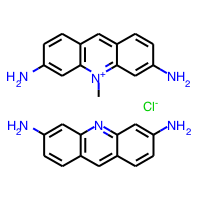
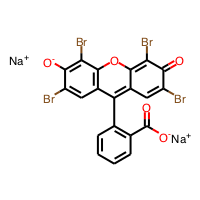
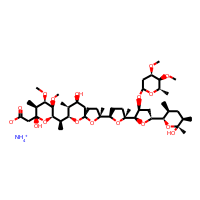
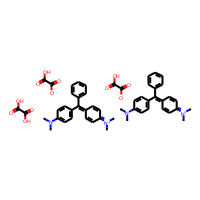
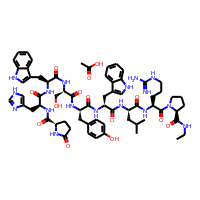

In [12]:
data = source.copy()
data.head(5)

## Datatypes

In [15]:
data.dtypes

Formula          object
FW               object
DSSTox_CID       object
SR-HSE           object
ID               object
SMILES           object
Molecule         object
NR-AR            object
SR-ARE           object
NR-Aromatase     object
NR-ER-LBD        object
NR-AhR           object
SR-MMP           object
NR-ER            object
NR-PPAR-gamma    object
SR-p53           object
SR-ATAD5         object
NR-AR-LBD        object
dtype: object

Clearly, not all data are object types:

* FW is object because it includes the addition of the certain substructures of the molecule (this is not useful, thus we can delete to reveal the numerical molecular weight only).

* The targets are all objects, these should just be floats.

## Duplicate data

The identifiers should be unique - if there are duplicated datapoints (by virtue of the SMILE), then these will not be unique:

In [21]:
N,p = data.shape
res = len(data['DSSTox_CID'].unique()) == N

print('All DSSTox_CID identifiers are unique in this dataset : {}'.format(res))

All DSSTox_CID identifiers are unique in this dataset : False


,Formula,FW,DSSTox_CID,SR-HSE,ID,SMILES,Molecule,NR-AR,SR-ARE,NR-Aromatase,NR-ER-LBD,NR-AhR,SR-MMP,NR-ER,NR-PPAR-gamma,SR-p53,SR-ATAD5,NR-AR-LBD
1169,C7H8O,108.1378,1869,0,NCGC00091519-09,Cc1ccc(O)cc1,,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4133,C7H8O,108.1378,1869,NaN,NCGC00013272-01,Cc1ccc(O)cc1,,0,NaN,NaN,0,NaN,0,1,0,0,0,0
5758,C7H8O,108.1378,1869,NaN,NCGC00091519-04,Cc1ccc(O)cc1,,0,NaN,0,0,0,0,0,0,0,0,0
8520,C7H8O,108.1378,1869,0,NCGC00257956-01,Cc1ccc(O)cc1,,0,0,0,0,0,NaN,0,0,0,0,0
9282,C7H8O,108.1378,1869,0,NCGC00253980-01,Cc1ccc(O)cc1,,0,0,NaN,0,0,0,0,0,0,0,0
10664,C7H8O,108.1378,1869,0,NCGC00258667-01,Cc1ccc(O)cc1,,0,0,0,0,0,0,0,0,0,0,0

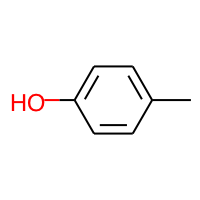
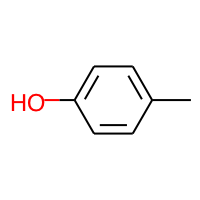
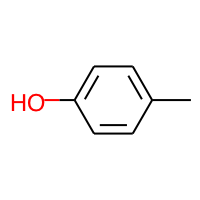
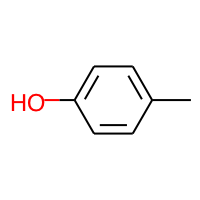
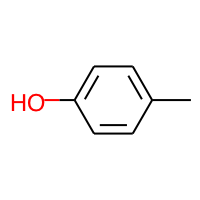
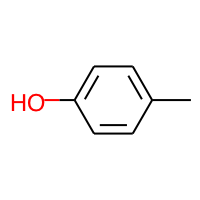

In [40]:
counts = dict(data['DSSTox_CID'].value_counts())
tox_id = max(counts, key=counts.get)

data[data['DSSTox_CID'] == tox_id]

This appears to be happening because the table has been updated on a temporal basis. Thus, the assumption taken here is that over time chemists and scientists have always added to the table instead of modifying the underlying row in the data itself.

With this assumption, in this study here - the rows will be amalgamated so as to delete as many NaNs as possible.

## Nulls

In [43]:
data.isnull().sum()

Formula             0
FW                  0
DSSTox_CID          0
SR-HSE           3612
ID                  0
SMILES              0
Molecule            0
NR-AR            2401
SR-ARE           4594
NR-Aromatase     4537
NR-ER-LBD        3010
NR-AhR           3594
SR-MMP           4442
NR-ER            4065
NR-PPAR-gamma    3579
SR-p53           3129
SR-ATAD5         2672
NR-AR-LBD        3164
dtype: int64

None of the smiles have null's (although one may find these again when feature extracting). It is only the targets that have NaNs - this imputing the data is no longer an option.

Many of these null's will be alleviated to the duplicated data. 

It would seem that we have two options:

1. Keep NaN as a seperate column option for each target
2. Introduce a weighting into all the modelling and metric computation to ensure that these null values are not counted when training and measuring model performance.

The second option is chosen.

## Conclusion

A script #INSERT NAME HERE# has been written to do the following:

1. Correct the datatypes of the dataset
2. Merge rows which belong to the same DSSTox_CID
3. Nothing further needs to be done for the nulls, however, when modelling a weighting matrix must be constructed to avoid counting the null values.